In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [7]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _times, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                df = df.sort_index(ascending=False)
                csv_array[_dir][_seed][_csv][_times] = df

In [8]:
def create_contour(time_number, file_name=False):
    time = times_list[time_number]
    print(time)
    df = csv_array[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [9]:
def create_contour_base(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [10]:
people = 'people30000'
seed = '123'
csv = 'census'

# コンター図

3600


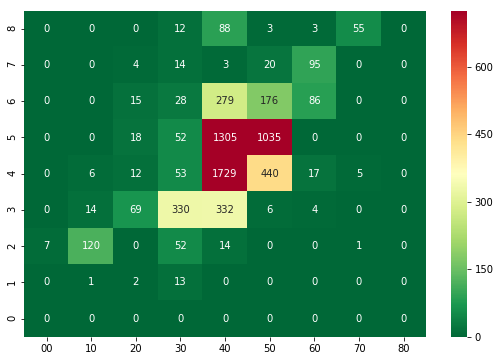

In [11]:
create_contour(0)

7200


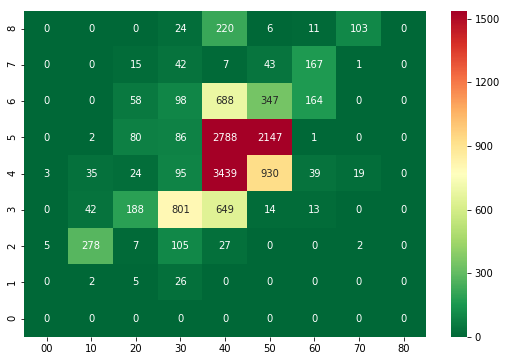

In [12]:
create_contour(1)

10800


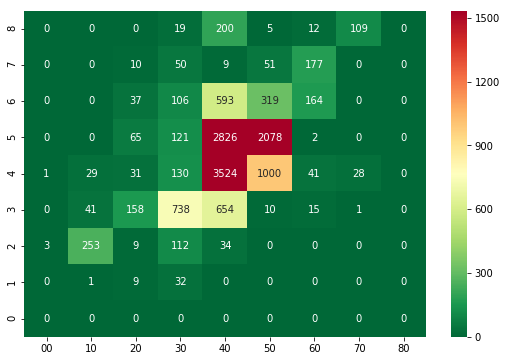

In [13]:
create_contour(2)

14400


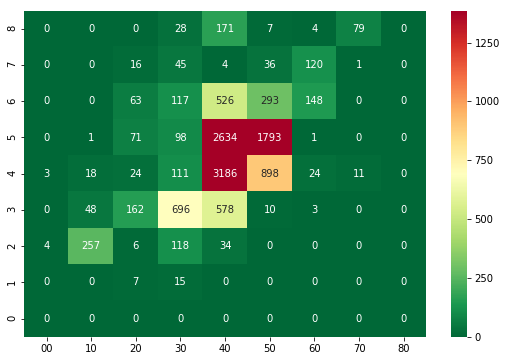

In [14]:
create_contour(3)

18000


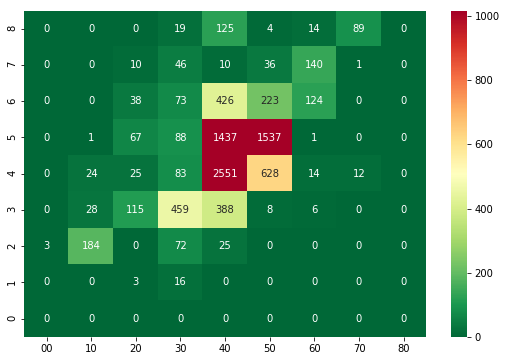

In [15]:
create_contour(4)

21600


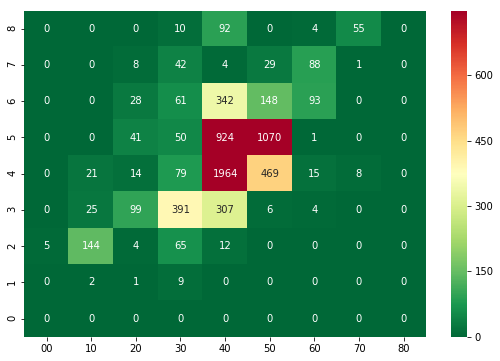

In [16]:
create_contour(5)

24856.0


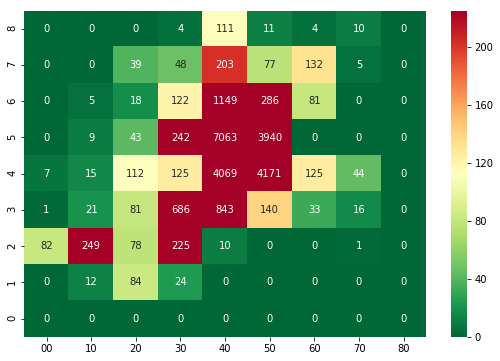

In [17]:
people = 'people30000'
seed = '123'
csv = 'mobile'
df_new = csv_array[people][seed][csv]['3600'].copy()
for _times in times_list:
    if _times != '3600':
        df_new += csv_array[people][seed][csv][_times].copy()
#     print(csv_array[people][seed][csv][_times].sum().sum())
# df_new -= csv_array[people][seed][csv]['3600'].copy()
print(df_new.sum().sum())
# create_contour(df_new)
plt.figure(figsize=(9,6))
sns.heatmap(df_new, annot=True, fmt='.0f', cmap='RdYlGn_r',
           vmax=df.sum().mean(), vmin=0)
    
# create_contour(df_new, '{0}seed{1}_{2}'.format(people, seed, csv))

In [18]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            sum_array = 0
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
#                 print(df.sum().sum())
                sum_array += df.sum().sum()
            print(_dir, _seed, _csv)
            print(sum_array)

people10000 123 census
20630.0
people10000 123 mobile
8173.0
people10000 124 census
20631.0
people10000 124 mobile
7964.0
people10000 125 census
20410.0
people10000 125 mobile
7958.0
people20000 123 census
41539.0
people20000 123 mobile
17013.0
people20000 124 census
41104.0
people20000 124 mobile
17260.0
people20000 125 census
41322.0
people20000 125 mobile
16869.0
people30000 123 census
62528.0
people30000 123 mobile
24856.0
people30000 124 census
58477.0
people30000 124 mobile
26558.0
people30000 125 census
59909.0
people30000 125 mobile
26006.0


# 各エリアの人数 / 全体人数 = 割合

In [19]:
csv_array_percent = {}
for _dir in dir_list:
    csv_array_percent[_dir] = {}
    for _seed in seed_list:
        csv_array_percent[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_percent[_dir][_seed][_csv] = {}
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
                df /= df.sum().sum()
                csv_array_percent[_dir][_seed][_csv][_times] = df

In [20]:
def create_contour_percent(time_number):
    time = times_list[time_number]
    print(time)
    df = csv_array_percent[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.3f', cmap='RdYlGn_r',
               vmax=0.02, vmin=0)

3600


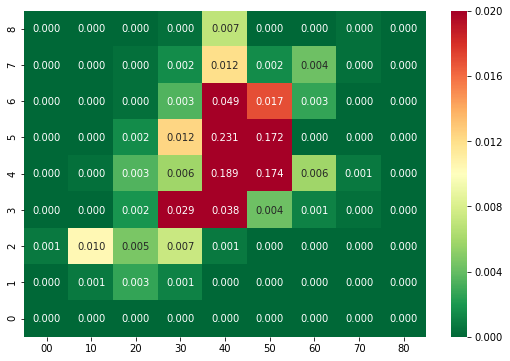

In [21]:
create_contour_percent(0)

7200


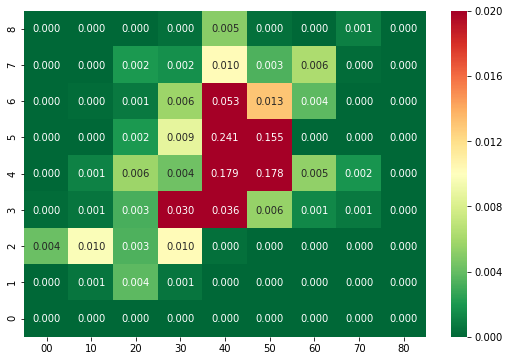

In [22]:
create_contour_percent(1)

10800


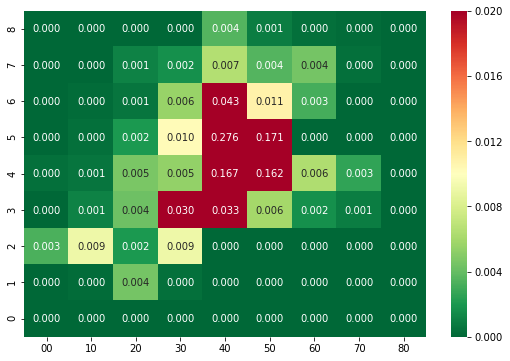

In [23]:
create_contour_percent(2)

14400


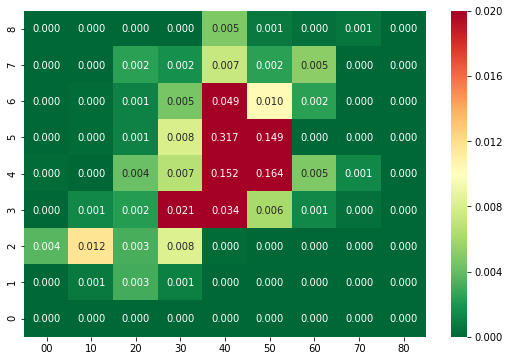

In [24]:
create_contour_percent(3)

18000


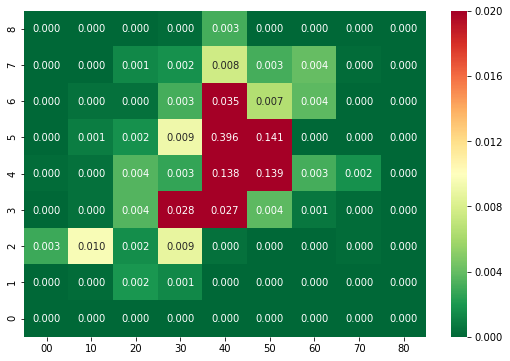

In [25]:
create_contour_percent(4)

21600


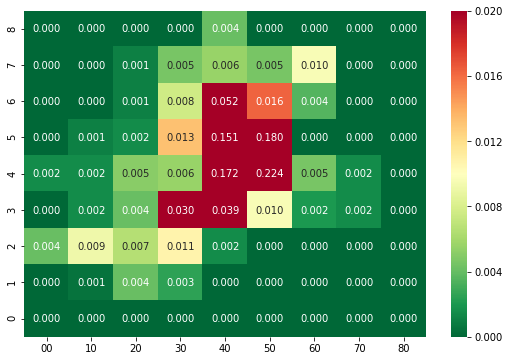

In [26]:
create_contour_percent(5)

# 1時間前とのpercentのdiff

In [27]:
csv_array_diff = {}
for _dir in dir_list:
    csv_array_diff[_dir] = {}
    for _seed in seed_list:
        csv_array_diff[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff[_dir][_seed][_csv] = {}
            for index, _times in enumerate(times_list):
                df = csv_array_percent[_dir][_seed][_csv][_times].copy()
                if _times != times_list[0]:
                    df_diff = csv_array_percent[_dir][_seed][_csv][times_list[index-1]]
                    df /= df_diff
                    df = df.replace(np.inf,np.nan).fillna(0)
                    csv_array_diff[_dir][_seed][_csv][_times] = df
#                 df.to_csv(root_dir + 'next_move_area_mobile_census/' + _dir + 'seed' + _seed + '_' + _csv + _times + '.csv')

In [28]:
def create_contour_diff(time_number):
    time = times_list[time_number]
    print(time)
    df = csv_array_diff[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
               vmax=2.5, vmin=0.5)

7200


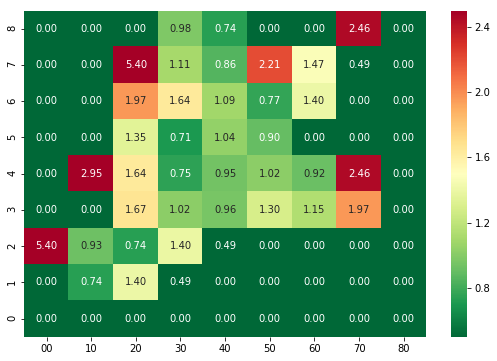

In [29]:
create_contour_diff(1)

10800


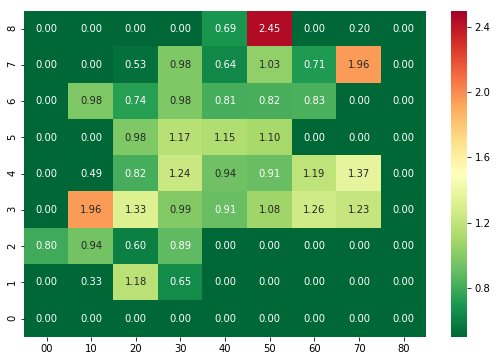

In [30]:
create_contour_diff(2)

14400


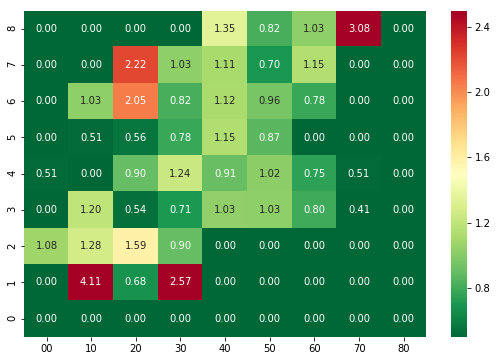

In [31]:
create_contour_diff(3)

18000


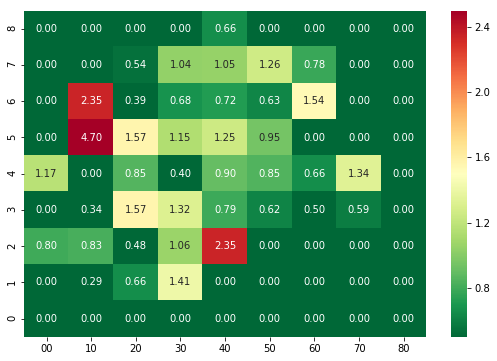

In [32]:
create_contour_diff(4)

21600


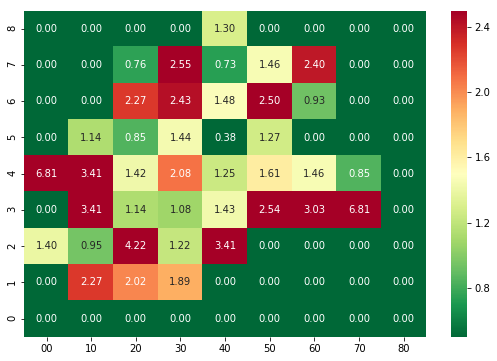

In [33]:
create_contour_diff(5)

# before_hour * diff

In [34]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    before_target = 'census'
    diff_target = 'mobile'
    before_hour = csv_array[people][seed][before_target][times_list[time_number-1]]
    diff = csv_array_diff[people][seed][diff_target][time]
    corrected = before_hour * diff
    
    plt.figure(figsize=(9,6))
    sns.heatmap(corrected, annot=True, fmt='.1f', cmap='RdYlGn_r',
               vmax=200, vmin=0)
    print('補正値合計:   ',corrected.sum().sum())
    print('mobile合計: ',csv_array[people][seed]['mobile'][time].sum().sum())
    print('census合計: ',csv_array[people][seed]['census'][time].sum().sum())

7200
補正値合計:    6636.943944322314
mobile合計:  5260.0
census合計:  13846.0


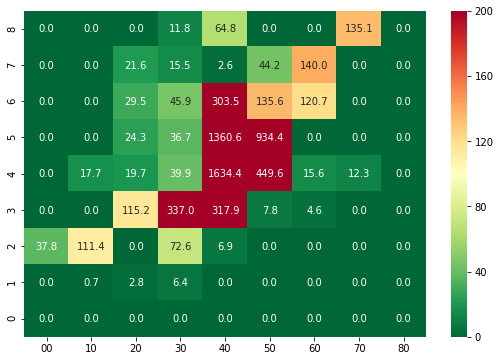

In [35]:
create_corrected(1)

10800
補正値合計:    13689.83549811167
mobile合計:  5367.0
census合計:  13807.0


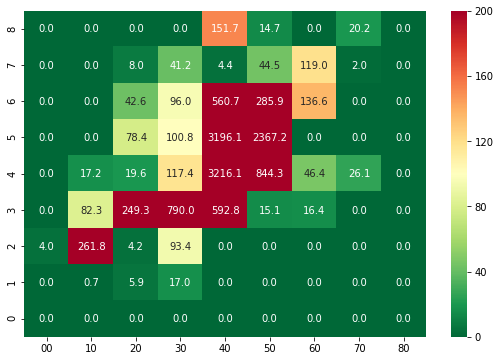

In [36]:
create_corrected(2)

14400
補正値合計:    13744.513100424518
mobile合計:  5229.0
census合計:  12469.0


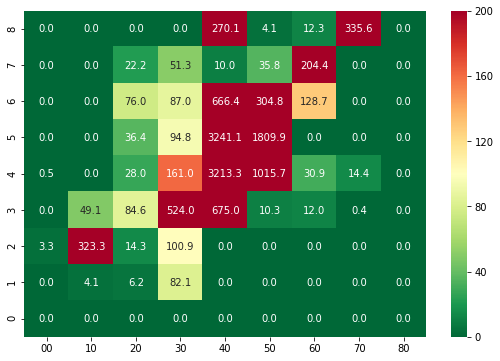

In [37]:
create_corrected(3)

18000
補正値合計:    12280.947251243928
mobile合計:  4454.0
census合計:  9153.0


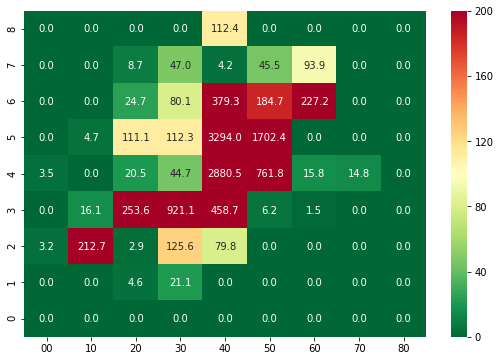

In [38]:
create_corrected(4)

21600
補正値合計:    11160.241710848202
mobile合計:  1962.0
census合計:  6735.0


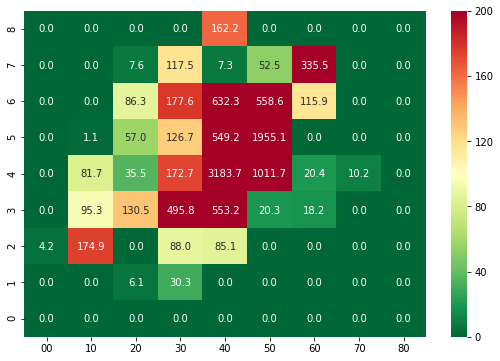

In [39]:
create_corrected(5)

# percent * normal

In [40]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    percent_target = 'mobile'
    normal_target = 'census'
    percent = csv_array_percent[people][seed][percent_target][time]
    normal = csv_array[people][seed][normal_target][time]
    corrected = percent * normal
    
    plt.figure(figsize=(9,6))
    sns.heatmap(corrected, annot=True, fmt='.1f', cmap='RdYlGn_r',
               vmax=200, vmin=0)
    print('補正値合計:   ',corrected.sum().sum())
    print(percent_target, '合計: ',csv_array[people][seed][percent_target][time].sum().sum())
    print(normal_target, '合計: ',csv_array[people][seed][normal_target][time].sum().sum())

In [41]:
# def create_corrected(time_number):
#     time = times_list[time_number]
#     print(time)
#     print(csv_array_percent[people][seed]['census'][time].sum().sum())
#     corrected = csv_array_percent[people][seed]['census'][time] * csv_array[people][seed]['mobile'][time]
# #     create_contour_base(corrected)
#     plt.figure(figsize=(9,6))
#     sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
#                vmax=df.sum().mean(), vmin=0)
#     print('補正値合計:   ',corrected.sum().sum())
#     print('ノーマル合計: ',csv_array[people][seed]['mobile'][time].sum().sum())

7200
補正値合計:    1882.8914448669202
mobile 合計:  5260.0
census 合計:  13846.0


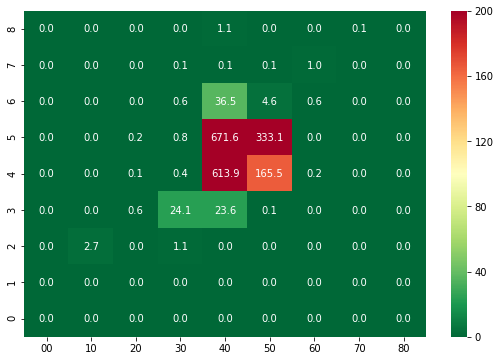

In [42]:
create_corrected(1)

10800
補正値合計:    1968.0640953978016
mobile 合計:  5367.0
census 合計:  13807.0


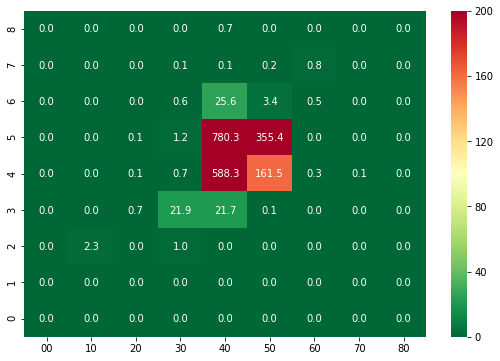

In [43]:
create_corrected(2)

14400
補正値合計:    1805.7328361063303
mobile 合計:  5229.0
census 合計:  12469.0


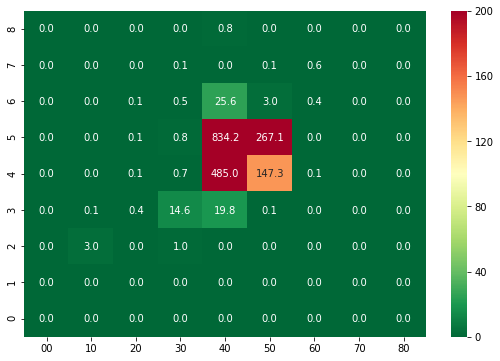

In [44]:
create_corrected(3)

18000
補正値合計:    1270.9299506061968
mobile 合計:  4454.0
census 合計:  9153.0


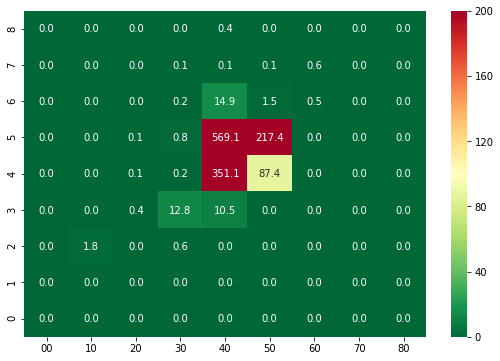

In [45]:
create_corrected(4)

21600
補正値合計:    825.130988786952
mobile 合計:  1962.0
census 合計:  6735.0


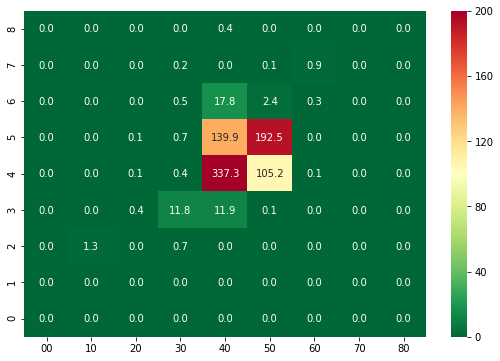

In [46]:
create_corrected(5)

# 1時間前とのdiff(normal)

In [47]:
csv_array_diff_normal = {}
for _dir in dir_list:
    csv_array_diff_normal[_dir] = {}
    for _seed in seed_list:
        csv_array_diff_normal[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff_normal[_dir][_seed][_csv] = {}
            for index, _times in enumerate(times_list):
                df = csv_array[_dir][_seed][_csv][_times].copy()
                if _times != times_list[0]:
                    df_diff = csv_array[_dir][_seed][_csv][times_list[index-1]]
                    df /= df_diff
#                     df = df.replace(np.inf,np.nan).fillna(0)
                    csv_array_diff_normal[_dir][_seed][_csv][_times] = df

In [48]:
def create_contour_diff_normal(time_number):
    time = times_list[time_number]
    df = csv_array_diff_normal[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
               vmax=2, vmin=1)

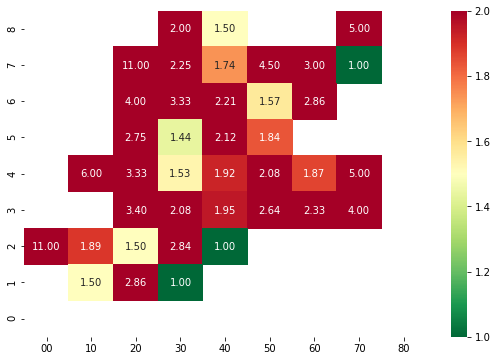

In [49]:
create_contour_diff_normal(1)

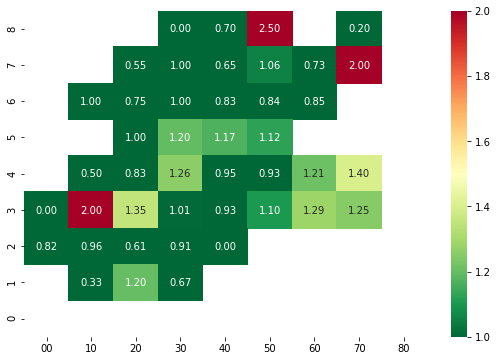

In [50]:
create_contour_diff_normal(2)

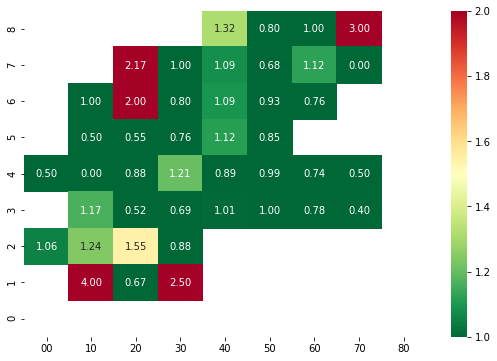

In [51]:
create_contour_diff_normal(3)

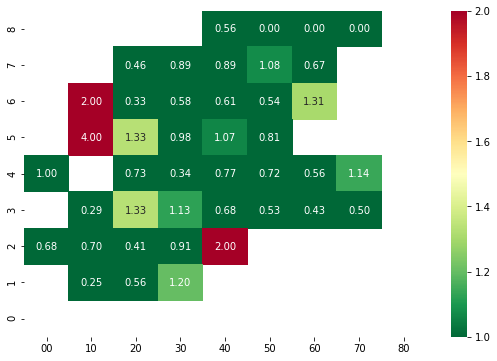

In [52]:
create_contour_diff_normal(4)

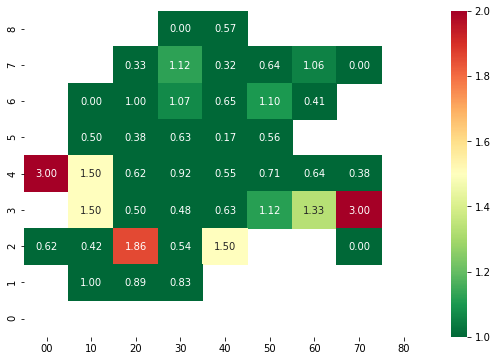

In [53]:
create_contour_diff_normal(5)